# Stock Price Prediction using Crude Oil Prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

Datasets:
- [Stock Price dataset](https://www1.nseindia.com/live_market/dynaContent/live_watch/get_quote/GetQuote.jsp?symbol=TATACHEM#)
- [Crude Oil dataset](https://markets.businessinsider.com/commodities/historical-prices/oil-price/usd?type=brent)

In [2]:
data = pd.read_csv('stock_crude.csv',',')
features=['Crude']

Plotting Stock Price Time Series

<Figure size 432x288 with 0 Axes>

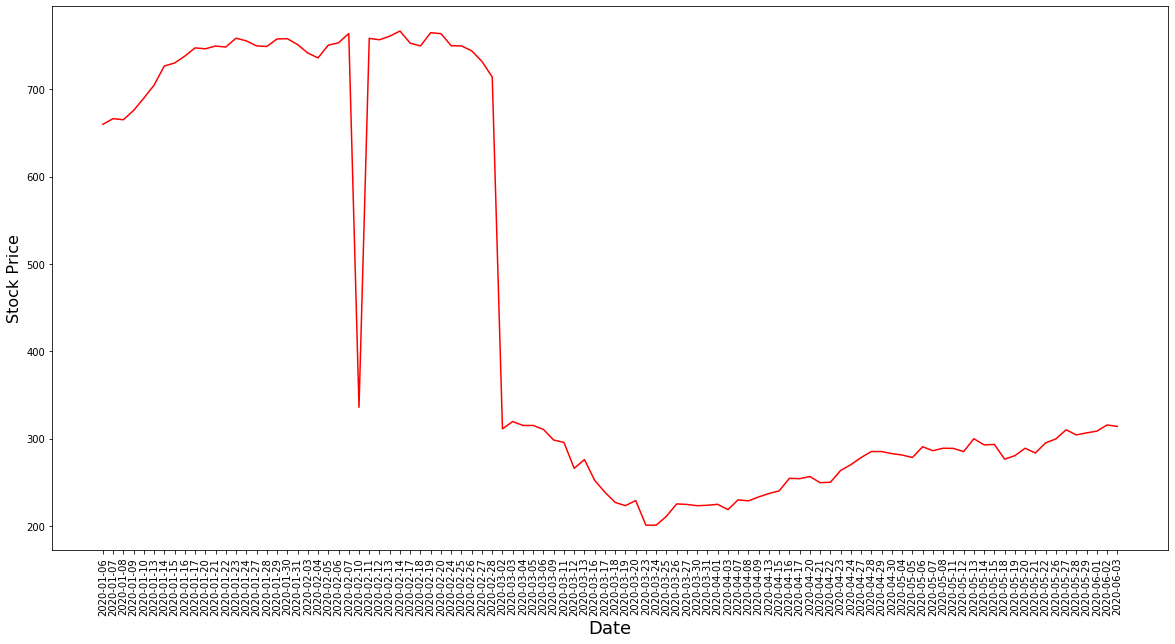

In [3]:
fig = plt.figure()
plt.figure(figsize=(20,10)) 
plt.plot(data.Date,data.Price,color='red')
fig.suptitle('Date v/s Stock price', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=16)
plt.xticks(rotation=90)
plt.show()

Plotting Crude Oil Price Time Series

<Figure size 432x288 with 0 Axes>

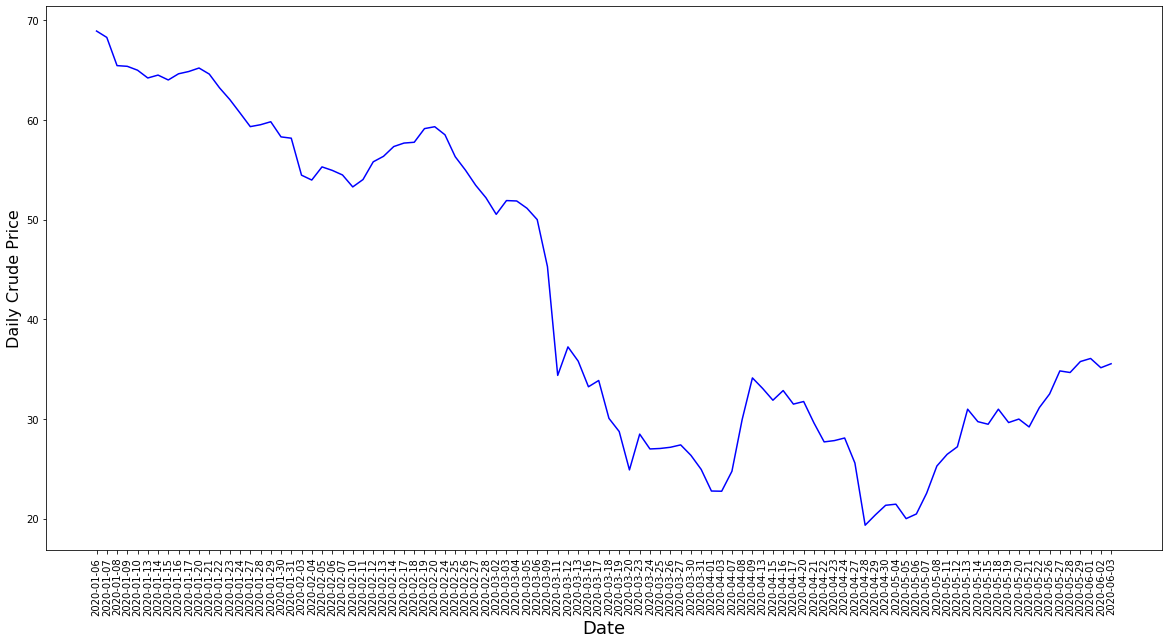

In [4]:
fig = plt.figure()
plt.figure(figsize=(20,10)) 
plt.plot(data.Date,data.Crude,color='blue')
fig.suptitle('Date v/s Crude Price', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily Crude Price', fontsize=16)
plt.xticks(rotation=90)
#plt.figure(figsize=(20,20)) 
plt.show()
plt.show()

Correlation

[[1.         0.89876835]
 [0.89876835 1.        ]]


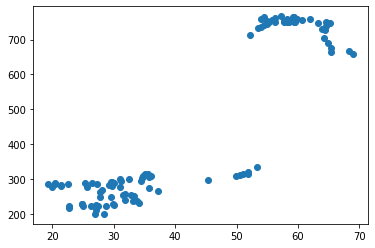

In [5]:
r = np.corrcoef(data.Crude,data.Price)
print(r)
plt.scatter(data.Crude,data.Price)
plt.show()

Since, the dataset is small, for better prediction we have selected three features:
1. Crude Oil Price
2. Average Crude Oil Price of last 3 days
3. Average Stock Price of last 3 days 

In [6]:
crude = data.loc[:,features].values
price = data.Price.values
date =  data.Date.values
X=np.ndarray([len(crude),3])
for i in range(X.shape[0]):
    X[i][0]=crude[i]
    if i>=3:
        X[i][1]=(price[i]+price[i-1]+price[i-2])/3
        X[i][2]=(crude[i]+crude[i-1]+crude[i-2])/3
    else:
        X[i][1]=price[i]
        X[i][2]=crude[i]
#print(X)

Y = data.Price.values

We divided the dataset into 80% training data and 20% testing data

In [7]:
date_train, date_test, Y_train, Y_test = model_selection.train_test_split (date, Y, test_size=0.20,shuffle=False)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.20,shuffle=False)
pX_train, pX_test, pY_train, pY_test = model_selection.train_test_split (crude, Y, test_size=0.20,shuffle=False)

Generating a new feature matrix consisting of all polynomial combinations of the features

In [8]:
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

We are using Linear Regression to train the model

In [9]:
model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly_test)

Model Evaluation

In [12]:
rmse = np.sqrt(mean_squared_error(Y_test,y_poly_pred))
r2 = r2_score(Y_test,y_poly_pred)
print("RMSE =",rmse)
print("R squared =",r2)

RMSE = 5.782573076496831
R squared = 0.7277907466311838


<Figure size 432x288 with 0 Axes>

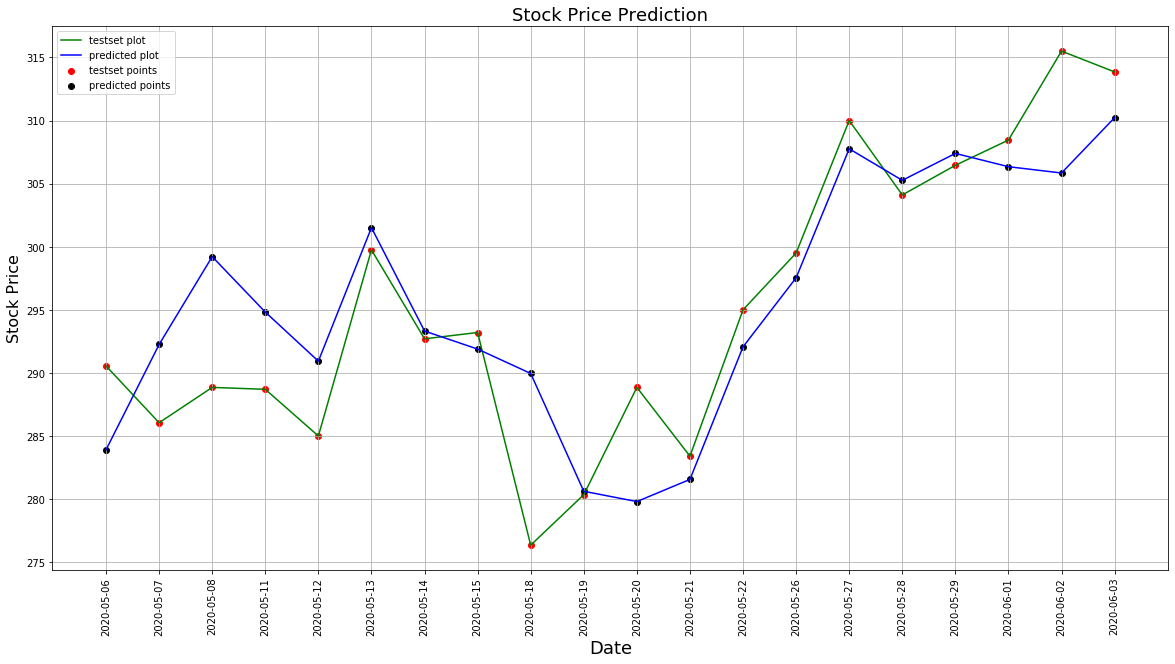

In [11]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.scatter(np.array(date_test).reshape(-1),np.array(pY_test).reshape(-1),color='red',label='testset points')
plt.plot(np.array(date_test).reshape(-1),np.array(pY_test).reshape(-1),color='green',label='testset plot')
plt.scatter(np.array(date_test).reshape(-1),np.array(y_poly_pred).reshape(-1),color='black',label='predicted points')
plt.plot(np.array(date_test).reshape(-1),np.array(y_poly_pred).reshape(-1),color='blue',label='predicted plot')
plt.title("Stock Price Prediction", fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=16)
plt.legend(loc="best")
plt.xticks(rotation=90)
plt.grid()
plt.show()